In [2]:
import numpy as np
import pandas as pd

from picmol import UNIFACThermoModel, load_molecular_properties, PhaseDiagramPlotter

In [3]:
# retreive molecules in database
mol_props = load_molecular_properties('mol_id')
mol_props.head()

,mol_name,mol_wt,density,molarity,molar_vol,n_electrons,mol_charge,mol_class,smiles
mol_id,,,,,,,,,
ADAAM,ADAAMEH,692.190,0.895,1.293,773.390,390,0,extractant,CCCCC(CC)CN(CC(CC)CCCC)C(=O)CN(CC(CC)CCCC)CC(=...
DMDBP,DBP,312.190,0.935,2.994,333.890,182,0,extractant,CCCCN(C)C(=O)C(C(=O)N(C)CCCC)CCCCC
THMA,THMA,438.741,0.889,2.027,493.416,246,0,extractant,CCCCCCN(CCCCCC)C(=O)C(C(=O)N(CCCCCC)CCCCCC)
DMDBT,DBTD,438.820,0.908,2.069,483.280,246,0,extractant,CCCCN(C)C(=O)C(C(=O)N(C)CCCC)CCCCCCCCCCCCCC
DMDOH,DOHE,482.880,0.927,1.919,520.910,270,0,extractant,CCCCCCCCN(C)C(=O)C(C(=O)N(C)CCCCCCCC)CCOCCCCCC


In [4]:
# get molecule names
mol_props.index

Index(['ADAAM', 'DMDBP', 'THMA', 'DMDBT', 'DMDOH', 'TEHDG', 'TODGA', 'BUTOL',
       'ETHOL', 'HEXOL', 'METOL', 'OCTOL', 'PRPOL', 'TIP4P', 'BENZE', 'CYHEX',
       'DECAN', 'NDODE', 'HEPTA', 'HEXAN', 'OCTAN', 'TDECA', 'TOLUE', 'ACENI',
       'THF', 'PIPER', 'PYRID', 'CHLOR', 'NITRA', 'PERCL', 'BFTET', 'PFHEX',
       'TFSI', 'Li', 'Na', 'K', 'Rb', 'Cs', 'Mg', 'Ca', 'Sr', 'Ba', 'La', 'Ce',
       'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
       'EMIM', 'PMIM', 'BMIM', 'HMIM', 'OMIM', 'DMIM', '[BMIM][BF4]',
       '[BMIM][CL]', '[BMIM][NO3]', '[BMIM][PF6]', 'BMIM_TFSI',
       '[BMPIP][TFSI]', '[BMPYR][TFSI]', '[BPY][TFSI]', '[EBPIP][TFSI]',
       '[EMIM][BF4]', '[EMIM][CL]', '[EMIM][NO3]', '[EMIM][PF6]', 'EMIM_TFSI',
       '[EMPIP][TFSI]', '[EMPYR][TFSI]', '[EPY][TFSI]', '[HMIM][BF4]',
       '[HMIM][CL]', '[HMIM][NO3]', '[HMIM][PF6]', 'HMIM_TFSI',
       '[HMPIP][TFSI]', '[HMPYR][TFSI]', '[HPY][TFSI]', '[OMIM][BF4]',
       '[OMIM][CL]', '[OMIM][NO3]', 

In [12]:
# specify each molecule in binary mixture
solute = 'ethol'
solvent = 'hepta'

# get molecules as they appear in dataset
mols = [solute.upper() ,solvent.upper()]

In [21]:
# initialize Unifac-thermo-model

unif_model = UNIFACThermoModel(
    identifiers=mols, identifier_type='mol_id', solute_mol=mols[0],
    Tmin=200, Tmax=500, dT=5
)

In [22]:
# run temperature scaling, thermodynamic model
unif_model.run()

In [23]:
print('Critical point: ')
print(f'T_c: {unif_model.Tc:.0f} K')
print(f'x_c: {unif_model.xc:.3f} {unif_model.solute_name.lower()}')
print(f'phi_c: {unif_model.phic:.3f} {unif_model.solute_name.lower()}')

Critical point: 
T_c: 345 K
x_c: 0.404 ethanol
phi_c: 0.212 ethanol


In [24]:
plotter = PhaseDiagramPlotter(unif_model)


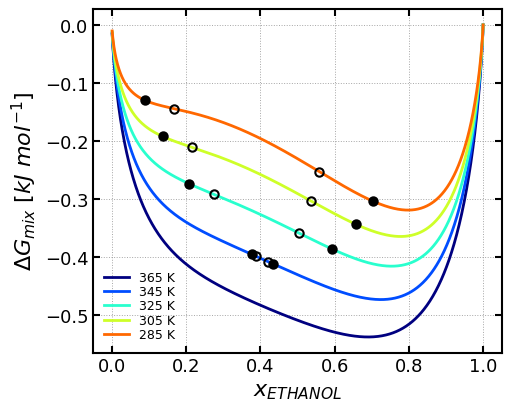

In [ ]:
# selected Temperatures to show how Gmix changes as T < Tc for a UCST
plotter.binary_gmix_selectpts(basis='mol', show_fig=True)

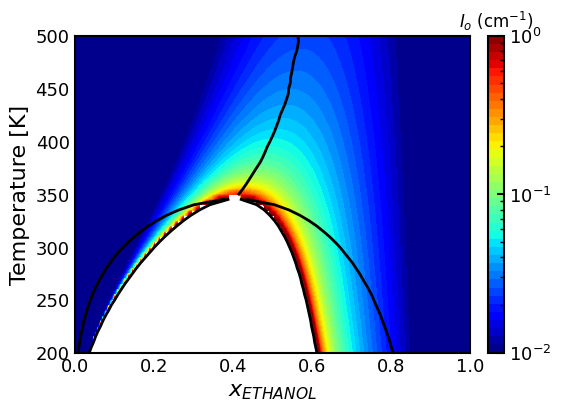

In [ ]:
# SAXS Io calculation with widom linewith overlayed phase diagram
plotter.binary_phase_diagram_I0_heatmap_widomline(basis='mol', show_fig=True)

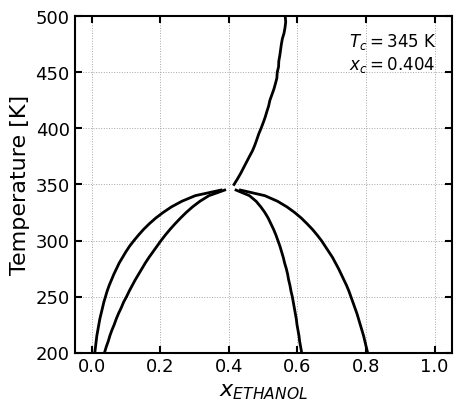

In [27]:
# labeled phase diagram with widom line
plotter.binary_phase_diagram_widomline(basis='mol', show_fig=True)